In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

/home/nakagawa/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def calc_accuracy(df):
    return (df['true_label'] == df['predict_label']).sum() / len(df)

# Prediction Import

In [3]:
LABELS = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
df = pd.read_csv('predict.csv', index_col=0)
predict = df.drop('true', axis=1)
true = df['true']
del df
true_encoded = true.map(lambda x: LABELS[x])
true_encoded.name = 'true_label'
predict.columns = LABELS
predict.head()

,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking
0,0.438712,1.376818,-0.524669,-0.814212,-0.394946,-0.637634
1,0.440656,1.375752,-0.525649,-0.817755,-0.395807,-0.635748
2,0.443222,1.375511,-0.524790,-0.816030,-0.396197,-0.636307
3,0.438276,1.377259,-0.521637,-0.818161,-0.395959,-0.637806
4,0.441040,1.372874,-0.525613,-0.818802,-0.395012,-0.635782


In [4]:
# min-max normalization
predict = predict.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
predict = predict.apply(lambda x: x / x.sum(), axis=1)

predict_label = predict.idxmax(axis=1)
predict_probability = predict.max(axis=1)
predict_probability.name = 'predict_probability'
predict_label.name = 'predict_label'
# predict.head()
# true.head()
# true_encoded.head()

In [5]:
df = pd.concat([
            predict,
            predict_probability,
            true,
            predict_label,
            true_encoded
        ], axis=1)
df.head(10)

,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking,predict_probability,true,predict_label,true_label
0,0.289403,0.506088,0.066879,0.0,0.096843,0.040786,0.506088,5,Jogging,Walking
1,0.289424,0.504489,0.067182,0.0,0.097045,0.041860,0.504489,2,Jogging,Sitting
2,0.290044,0.504778,0.067081,0.0,0.096700,0.041396,0.504778,4,Jogging,Upstairs
3,0.288774,0.504586,0.068152,0.0,0.097037,0.041452,0.504586,1,Jogging,Jogging
4,0.289518,0.503658,0.067376,0.0,0.097389,0.042059,0.503658,3,Jogging,Standing
5,0.289738,0.504649,0.067168,0.0,0.097060,0.041386,0.504649,5,Jogging,Walking
6,0.289253,0.504273,0.067285,0.0,0.097306,0.041882,0.504273,0,Jogging,Downstairs
7,0.289469,0.505177,0.066914,0.0,0.096672,0.041768,0.505177,0,Jogging,Downstairs
8,0.289402,0.504310,0.067007,0.0,0.097611,0.041670,0.504310,1,Jogging,Jogging
9,0.290051,0.504496,0.067672,0.0,0.096889,0.040892,0.504496,5,Jogging,Walking


Accuracy:  0.313949253368945


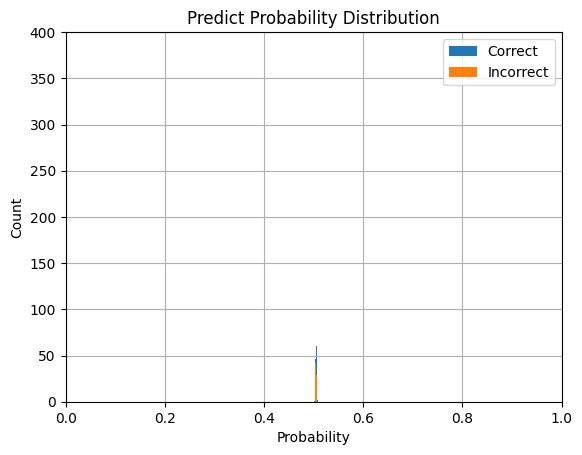

In [6]:
print('Accuracy: ', calc_accuracy(df))
# statival analysis
df.loc[df.true_label==df.predict_label, 'predict_probability'].hist(bins=100)
df.loc[df.true_label!=df.predict_label, 'predict_probability'].hist(bins=100)
plt.title('Predict Probability Distribution')
plt.xlim(0, 1)
plt.ylim(0, 400)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.legend(['Correct', 'Incorrect'])

In [7]:
df['predict_probability'].agg(['mean', 'std', 'min', 'max', 'median'])

mean      0.504657
std       0.000772
min       0.499749
max       0.508500
median    0.504606
Name: predict_probability, dtype: float64